In [1]:
import cv2
import matplotlib.pyplot as plt

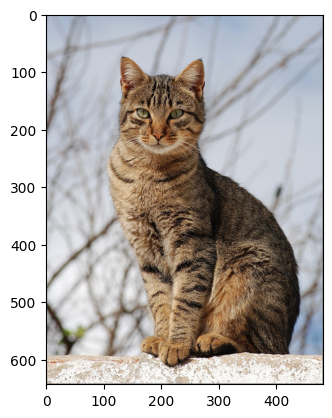

In [4]:
img = cv2.imread('./cat.jpg')
img = img[:, :, ::-1]
plt.imshow(img)

**1. Sử dụng boxFilter: cv2.blur() hoặc cv2.boxFilter() để làm mờ ảnh (sử dụng nhiều thông số filter khác nhau), biểu diễn ảnh gốc và ảnh làm mờ cùng nhau để kiểm chứng.** 

In [5]:
blur_1 = cv2.blur(img, (3, 3))
blur_2 = cv2.blur(img, (7, 7))

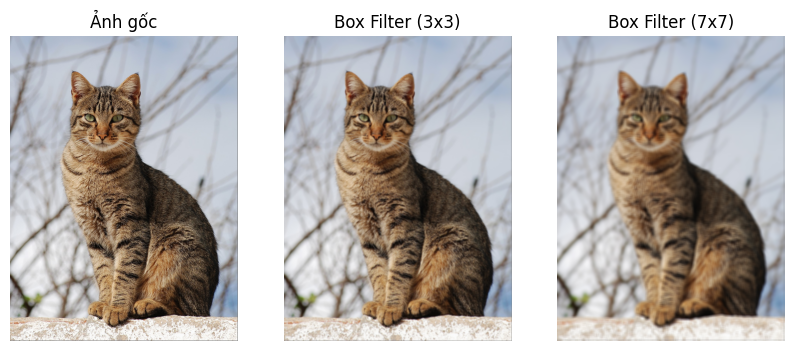

In [6]:
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Ảnh gốc")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(blur_1)
plt.title("Box Filter (3x3)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(blur_2)
plt.title("Box Filter (7x7)")
plt.axis('off')

plt.show()

**2. Sử dụng Gaussian Filter # Lưu ý: kích thước bộ lọc là số lẻ.**

In [7]:
gaussian_1 = cv2.GaussianBlur(img, (5,5), 0)
gaussian_2 = cv2.GaussianBlur(img, (11,11), 0)

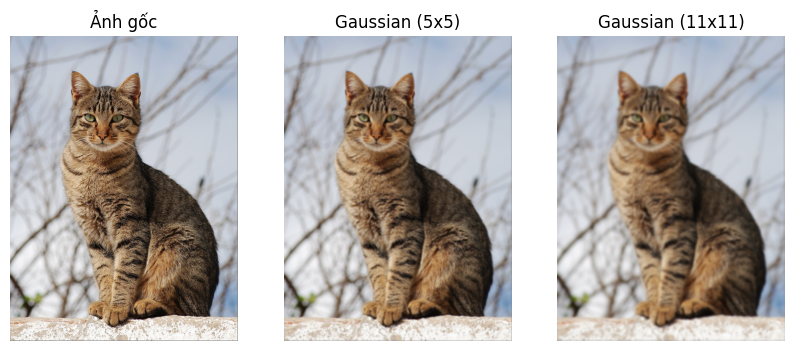

In [8]:
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Ảnh gốc")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gaussian_1)
plt.title("Gaussian (5x5)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(gaussian_2)
plt.title("Gaussian (11x11)")
plt.axis('off')

plt.show()


**3. Sử dụng Median Filter**

In [9]:
median_1 = cv2.medianBlur(img, 5)
median_2 = cv2.medianBlur(img, 9)


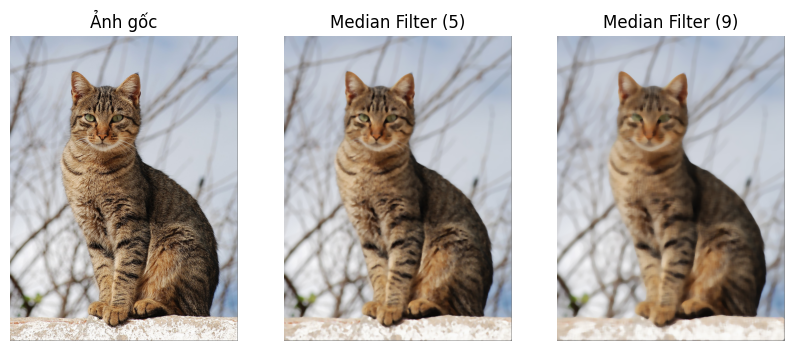

In [10]:
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Ảnh gốc")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(median_1)
plt.title("Median Filter (5)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(median_2)
plt.title("Median Filter (9)")
plt.axis('off')

plt.show()


**4. Kiểm tra lại các bộ lọc trên với hai hình ảnh pepper noise dưới đây:**

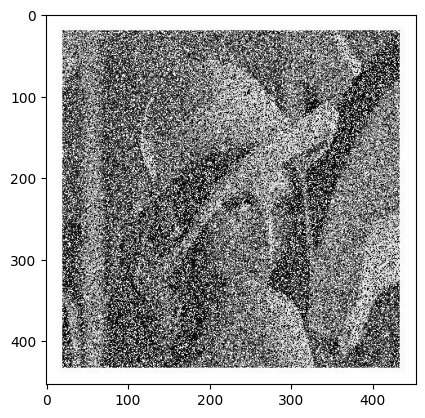

In [2]:
img = cv2.imread('pepper_noise02.jpg')
blur = cv2.medianBlur(img,5)
blur = cv2.cvtColor(blur, cv2.COLOR_RGB2GRAY)
plt.imshow(img)

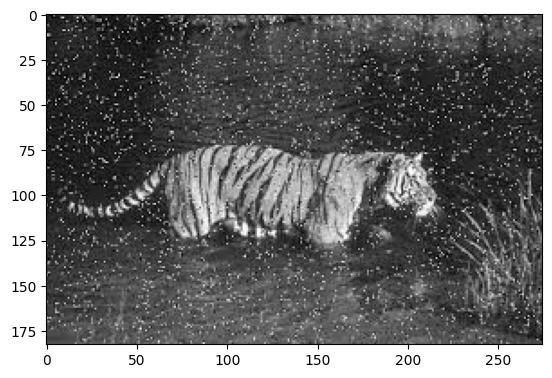

In [ ]:
img = cv2.imread('pepper_noise.jpg')
blur = cv2.medianBlur(img,5)
blur = cv2.cvtColor(blur, cv2.COLOR_RGB2GRAY)
plt.imshow(img)

để cân bằng sáng trước hết ta chuyển ảnh trắng đen (nếu có) sáng ảnh màu.

**5. Có nhận xét gì về các kích thước filter.**

- Filter phải ma trận hoặc kích thước là 3x3, 5x5, 11x11.
- Kích thước phải nhỏ và quá trình làm quá mờ bức ảnh

**6. Thực hành với Cân bằng sáng - equalizeHist, để cân bằng sáng, trước hết ta chuyển ảnh trắng đen (nếu có) sang ảnh màu.**

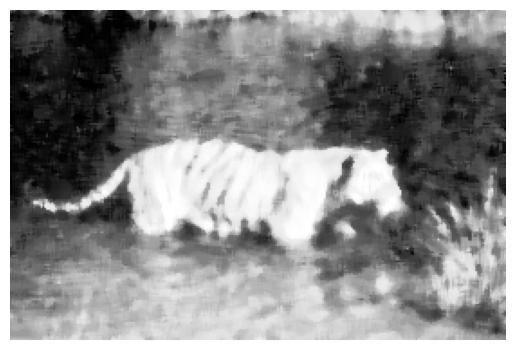

In [5]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('pepper_noise.jpg')

if img is None:
    print("Không đọc được ảnh. Kiểm tra path.")
else:
    blur = cv2.medianBlur(img, 5)
    gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    equal = cv2.equalizeHist(gray)

    plt.imshow(equal, cmap='gray')
    plt.axis('off')
    plt.show()


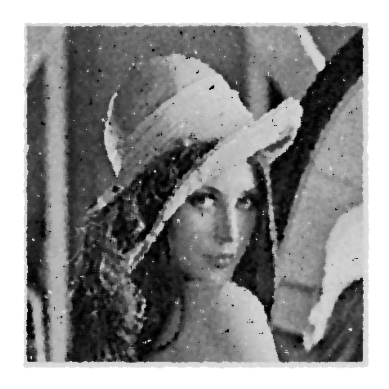

In [4]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('pepper_noise02.jpg')

if img is None:
    print("Không đọc được ảnh. Kiểm tra path.")
else:
    blur = cv2.medianBlur(img, 5)
    gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    equal = cv2.equalizeHist(gray)

    plt.imshow(equal, cmap='gray')
    plt.axis('off')
    plt.show()


**7. Bài tập trên lớp lý thuyết: FILTER bằng các phép toán số học và logic.**

**Given two images as follow (with different sizes: 193x157 and 194x160)**

**a. Crop two images to size 190x155**

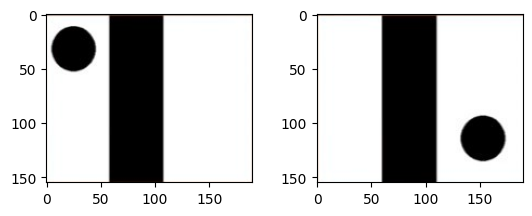

In [ ]:
img1 = cv2.imread('exT3_01.png')
img2 = cv2.imread('exT3_02.png')
img1 = img1[:155,1:191]
img2 = img2[:155,:190]

plt.subplot(2,2,1)
plt.imshow(img1)
plt.subplot(2,2,2)
plt.imshow(img2)

**b. Transform images to negative ones.**

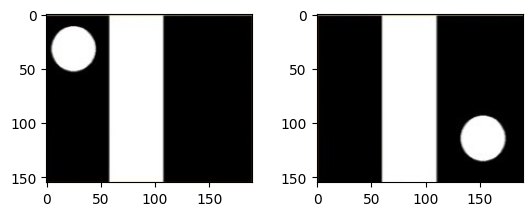

In [ ]:
inv_img1 = cv2.bitwise_not(img1)
inv_img2 = cv2.bitwise_not(img2)
plt.subplot(2,2,3)
plt.imshow(inv_img1)
plt.subplot(2,2,4)
plt.imshow(inv_img2)

**c. Process to have an image which has only the “ball”.**

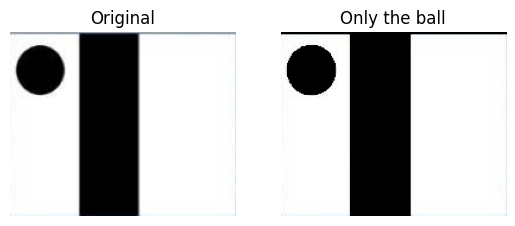

In [1]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('exT3_01.png')
img1 = img1[:155, 1:191]

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

_, mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

ball = cv2.bitwise_and(img1, img1, mask=mask)

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
ball = cv2.cvtColor(ball, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(img1)
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(ball)
plt.title("Only the ball")
plt.axis('off')

plt.show()
